<a href="https://colab.research.google.com/github/sofiacorreao/Analitica/blob/main/Reto_3_Sofia_Correa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.cluster import KMeans

1. Se cargan los archivos


Esta es la matriz de correlacion: 
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000
[[   26 18000    14]
 [   43 13000     9]
 [   55 42000    16]
 ...
 [   55 70000    17]
 [   68 64000    15]
 [   48 67000    18]]
[1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0

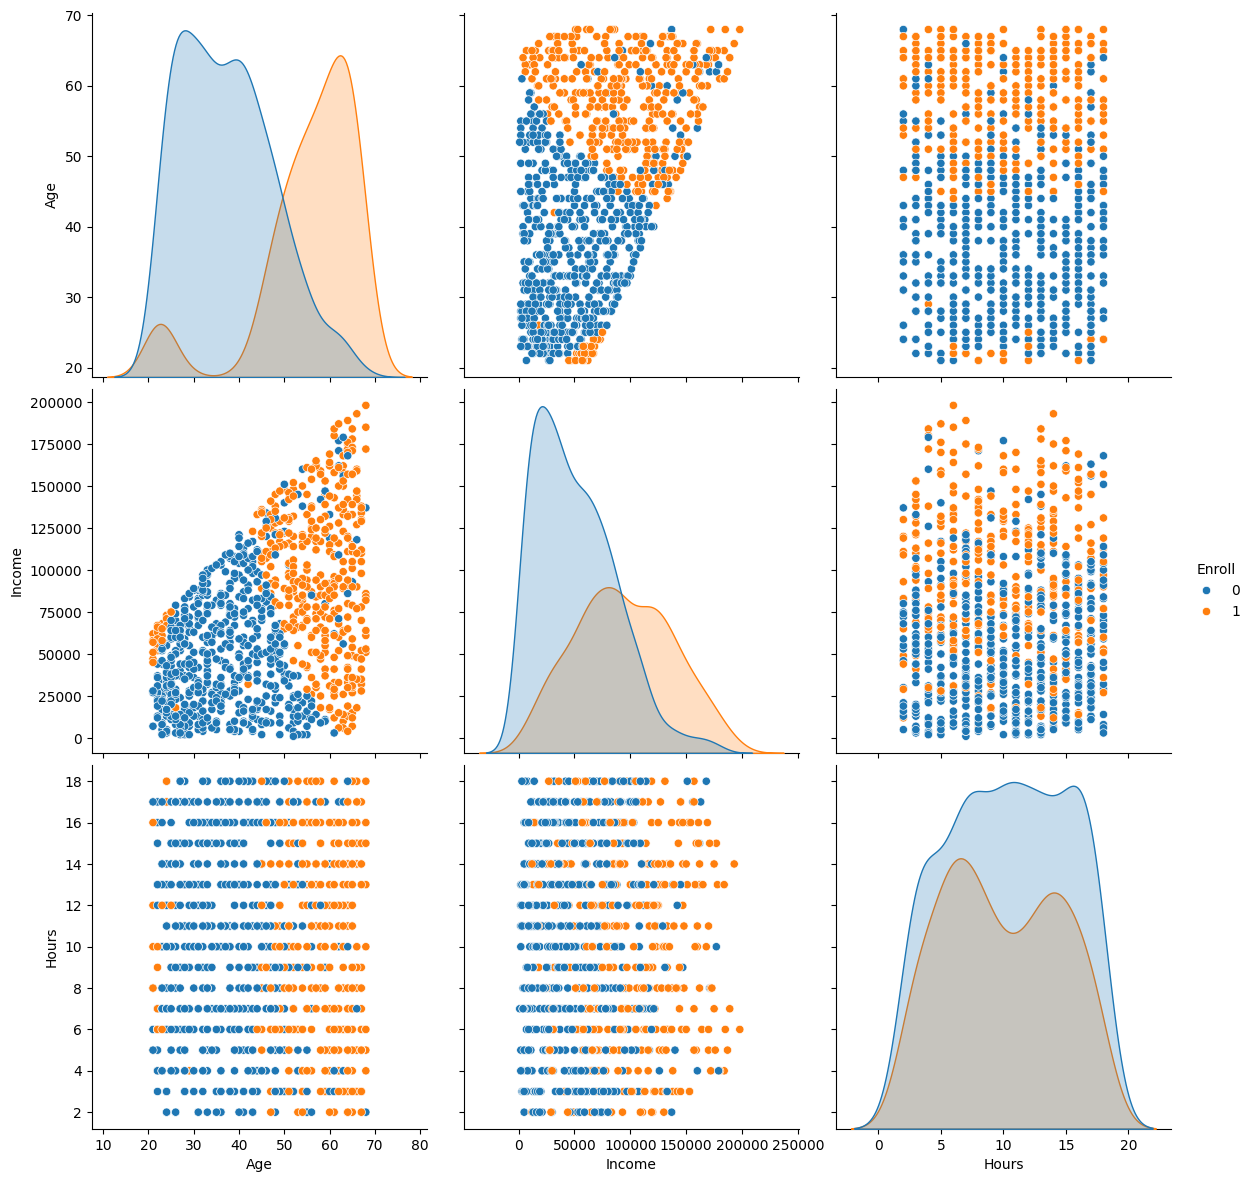

In [ ]:
nxl='/content/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100) #Mostrar las primeras 100 filas

XDB=XDB[['Age','Income','Hours','Enroll']]

sns.pairplot(XDB,hue='Enroll',height=4,vars=['Age','Income','Hours'])

#Para confirmar la bunea correlacion
corr=XDB.corr()
print('Esta es la matriz de correlacion: \n',corr)

#Se procede con la configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:, 0:3]) #Toma las variables de entrada
yd=np.array(XDB.iloc[:,3])#Toma variable de salida Enroll
print (XD)
print (yd)

2. Matriz de correlacion

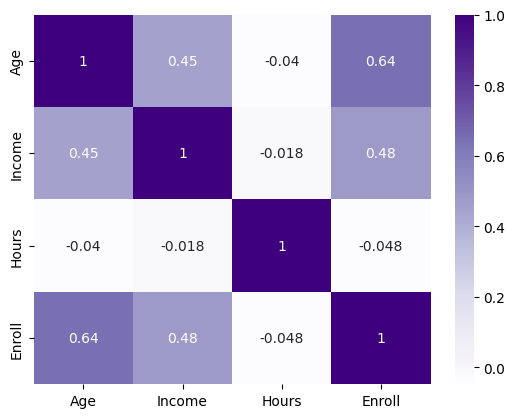

In [ ]:
sns.heatmap(corr,annot=True, cmap='Purples');

3. Implementación Modelo KNN

Esta es la matriz de confusion:
 [[538  59]
 [145 258]]
Exactitud: 0.796
Sensibilidad: 0.6401985111662531
Especificidad: 0.9011725293132329
El modelo me ingresa al gym: [0]


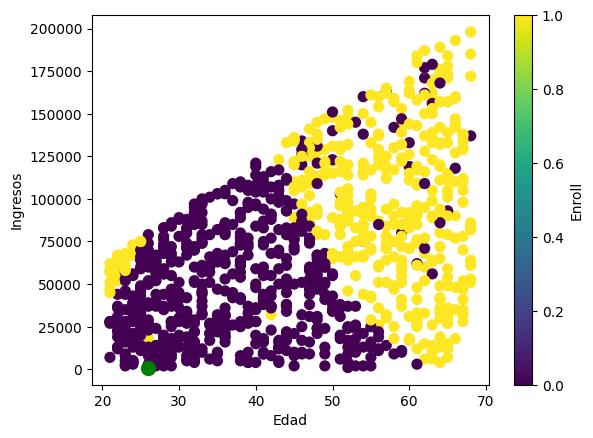

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print('Esta es la matriz de confusion:\n',cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print('Exactitud:',Exac)
print('Sensibilidad:',Sen)
print('Especificidad:',Spec)

#Model me vas prestar o no
XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print ('El modelo me ingresa al gym:',ydpp)

# Crear el gráfico de dispersión
scatter = plt.scatter(XD[:,0], XD[:,1], c=yd, s=50, cmap='viridis')
plt.scatter(XDP[:,0], XDP[:,1], marker='o', s=100, facecolors='green')

# Etiquetas de los ejes
plt.xlabel('Edad')
plt.ylabel('Ingresos')

# Añadir barra de color
colorbar = plt.colorbar(scatter, label = 'Enroll')
plt.show()

4. Construcción K means

Donde quedo el primer solicitante: 3
Donde quedo el segundo solicitante: 3
Donde quedo el tercer solicitante: 1
--------------------------------------------------------------------
El modelo me ingresa al gym: [3]
--------------------------------------------------------------------
El porcentaje de negados para el cluster 0 es: 0.5284552845528455
El porcentaje de aprobados para el cluster 0 es: 0.4715447154471545
--------------------------------------------------------------------
El porcentaje de negados para el cluster 1 es: 0.7226890756302521
El porcentaje de aprobados para el cluster 1 es: 0.2773109243697479
--------------------------------------------------------------------
El porcentaje de negados para el cluster 2 es: 0.3184713375796178
El porcentaje de aprobados para el cluster 2 es: 0.6815286624203821
--------------------------------------------------------------------
El porcentaje de negados para el cluster 3 es: 0.8487084870848709
El porcentaje de aprobados para el cluster

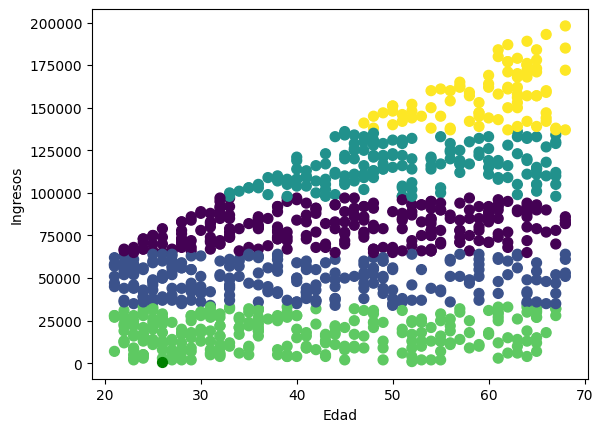

In [ ]:
np.random.seed(42)  # Para que todos tengamos el mismo modelo

# Crear el modelo de KMeans
mkm = KMeans(n_clusters=5, init='random', n_init= 10, random_state=42)
mkm.fit(XD)  # Solo usas XD para entrenar

labels = mkm.labels_  # Donde quedaron clasificados los datos
print('Donde quedo el primer solicitante:', labels[0])
print('Donde quedo el segundo solicitante:', labels[1])
print('Donde quedo el tercer solicitante:', labels[2])
print('--------------------------------------------------------------------')


# Graficar clusters
plt.scatter(XD[:, 0], XD[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(XDP[:, 0], XDP[:, 1], marker='o', s=50, facecolors='green')
plt.xlabel('Edad')
plt.ylabel('Ingresos')

# Predecir nuevo punto
XDP = np.array([[26, 800, 15]])
ydpp2 = mkm.predict(XDP)
print('El modelo me ingresa al gym:', ydpp2)
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 0
c00 = len(np.where((labels == 0) & (yd == 0))[0])
c01 = len(np.where((labels == 0) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 0 es:', c00 / (c00 + c01))
print('El porcentaje de aprobados para el cluster 0 es:', c01 / (c00 + c01))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 1
c10 = len(np.where((labels == 1) & (yd == 0))[0])
c11 = len(np.where((labels == 1) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 1 es:', c10 / (c10 + c11))
print('El porcentaje de aprobados para el cluster 1 es:', c11 / (c10 + c11))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 2
c20 = len(np.where((labels == 2) & (yd == 0))[0])
c21 = len(np.where((labels == 2) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 2 es:', c20 / (c20 + c21))
print('El porcentaje de aprobados para el cluster 2 es:', c21 / (c20 + c21))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 3
c30 = len(np.where((labels == 3) & (yd == 0))[0])
c31 = len(np.where((labels == 3) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 3 es:', c30 / (c30 + c31))
print('El porcentaje de aprobados para el cluster 3 es:', c31 / (c30 + c31))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 4
c40 = len(np.where((labels == 4) & (yd == 0))[0])
c41 = len(np.where((labels == 4) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 4 es:', c40 / (c40 + c41))
print('El porcentaje de aprobados para el cluster 4 es:', c41 / (c40 + c41))
print('--------------------------------------------------------------------')

# Características de cada cluster
clusters = mkm.cluster_centers_
print('Las características de cada cluster son:\n', clusters)

In [ ]:
# Número de individuos totales por cluster
print(f"Cluster 0: {len(np.where(mkm.labels_ == 0)[0])} individuos")
print(f"Cluster 1: {len(np.where(mkm.labels_ == 1)[0])} individuos")
print(f"Cluster 2: {len(np.where(mkm.labels_ == 2)[0])} individuos")
print(f"Cluster 3: {len(np.where(mkm.labels_ == 3)[0])} individuos")
print(f"Cluster 4: {len(np.where(mkm.labels_ == 4)[0])} individuos")

Cluster 0: 246 individuos
Cluster 1: 238 individuos
Cluster 2: 157 individuos
Cluster 3: 271 individuos
Cluster 4: 88 individuos


In [ ]:
# Número de individuos que SI van al gym por cluster
print(f"Cluster 0: {len(np.where((mkm.labels_ == 0) & (yd == 1))[0])} individuos")
print(f"Cluster 1: {len(np.where((mkm.labels_ == 1) & (yd == 1))[0])} individuos")
print(f"Cluster 2: {len(np.where((mkm.labels_ == 2) & (yd == 1))[0])} individuos")
print(f"Cluster 3: {len(np.where((mkm.labels_ == 3) & (yd == 1))[0])} individuos")
print(f"Cluster 4: {len(np.where((mkm.labels_ == 4) & (yd == 1))[0])} individuos")

Cluster 0: 116 individuos
Cluster 1: 66 individuos
Cluster 2: 107 individuos
Cluster 3: 41 individuos
Cluster 4: 73 individuos


In [ ]:
# Para el cluster 0
print(f'La edad media del cluster 0 es: {XD[mkm.labels_ == 0][: , 0].mean()}')
print(f'El ingreso medio del cluster 0 es: {XD[mkm.labels_ == 0][: , 1].mean()}')
print(f'Las horas promedio del cluster 0 es: {XD[mkm.labels_ == 0][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 1
print(f'La edad media del cluster 1 es: {XD[mkm.labels_ == 1][: , 0].mean()}')
print(f'El ingreso medio del cluster 1 es: {XD[mkm.labels_ == 1][: , 1].mean()}')
print(f'Las horas promedio del cluster 1 es: {XD[mkm.labels_ == 1][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 2
print(f'La edad media del cluster 2 es: {XD[mkm.labels_ == 2][: , 0].mean()}')
print(f'El ingreso medio del cluster 2 es: {XD[mkm.labels_ == 2][: , 1].mean()}')
print(f'Las horas promedio del cluster 2 es: {XD[mkm.labels_ == 2][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 3
print(f'La edad media del cluster 3 es: {XD[mkm.labels_ == 3][: , 0].mean()}')
print(f'El ingreso medio del cluster 3 es: {XD[mkm.labels_ == 3][: , 1].mean()}')
print(f'Las horas promedio del cluster 3 es: {XD[mkm.labels_ == 3][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 4
print(f'La edad media del cluster 4 es: {XD[mkm.labels_ == 4][: , 0].mean()}')
print(f'El ingreso medio del cluster 4 es: {XD[mkm.labels_ == 4][: , 1].mean()}')
print(f'Las horas promedio del cluster 4 es: {XD[mkm.labels_ == 4][: , 2].mean()}')
print('--------------------------------------------------------------------')

La edad media del cluster 0 es: 44.857723577235774
El ingreso medio del cluster 0 es: 80146.34146341463
Las horas promedio del cluster 0 es: 10.333333333333334
--------------------------------------------------------------------
La edad media del cluster 1 es: 39.747899159663866
El ingreso medio del cluster 1 es: 49365.5462184874
Las horas promedio del cluster 1 es: 10.281512605042018
--------------------------------------------------------------------
La edad media del cluster 2 es: 51.261146496815286
El ingreso medio del cluster 2 es: 115770.70063694268
Las horas promedio del cluster 2 es: 9.80891719745223
--------------------------------------------------------------------
La edad media del cluster 3 es: 39.690036900369
El ingreso medio del cluster 3 es: 17760.147601476016
Las horas promedio del cluster 3 es: 10.188191881918819
--------------------------------------------------------------------
La edad media del cluster 4 es: 60.03409090909091
El ingreso medio del cluster 4 es: 157

# Análisis de resultados

De acuerdo con la base de datos suministrada y los análisis realizados, la edad es la variable más influyente en la decisión de una persona para inscribirse al gimnasio, seguida de los ingresos. Esto indica que personas de mayor edad y con ingresos más altos tienen una mayor tendencia a inscribirse. Sin embargo, las horas dedicadas al ejercicio en el gimnasio muestran una correlación negativa y débil con la inscripción, lo que implica que esta variable no juega un papel significativo en la decisión. El modelo KNN alcanzó una exactitud cercana al 80%, con una sensibilidad del 64%, lo que indica que es más efectivo para identificar a quienes no se inscriben que a quienes sí lo hacen (reflejado en la especificidad del 90%). En cuanto al pronóstico individual, ambos modelos (KNN y K-Means) concluyen que una persona de 26 años, con ingresos anuales de $800 y 15 horas de ejercicio, no se inscribirá al gimnasio, lo que sugiere que estos factores, en conjunto, no son lo suficientemente favorables para motivar la inscripción.

# Preguntas word

**Punto 1: Describir en el análisis de resultados cada una de las variables que hacen parte de la base de datos.**

*Variables*

- Age: edad de las personas registradas en la base de datos. De tipo entero.

- Income: ingresos registrados de cada persona en la base de datos. de tipo entero.

- Hours: horas estimadas de ejercicio en el gimnasio de cada persona. De tipo entero.

- Enroll: variable dependiente o a predecir, puede tomar el valor de 1 si la persona se inscribe al gimnadio o de 0 en caso de que no lo haga.

**Punto 2: Determinar la variable que mejor lleva a cabo el proceso de caracterización de la inscripción de una persona al Gym.**

Tras observar la matriz de correlación entre las variables, se puede concluir que aquella que tenga mayor correlación con la variable dependiente 'Enroll' sera la que mejor la describe, en este caso, la variable independiente 'Age' es la que mejor lo hace con un valor de correlacion 0.64.

**Punto 3: Según las variables de entrada y de salida, determinar cuáles variables tienen una mayor correlación entre ellas.**

Las variables con mas correlacion entre ellas son (siendo 1 las variables con mayor correlacion y 6 con menor):

1. Enroll - Age: 0.64
2. Enroll - Income: 0.48
3. Income - Age: 0.45
4. Hours - Income: -0.018
5. Hours - Age: -0.04
6. Enroll - Hours: -0.048

**Punto 4: Determinar el comportamiento del modelo KNN en el pronóstico de los datos utilizados para la configuración del modelo en cuanto a exactitud, sensibilidad y especificidad.**

La exactitud alcanzada por el modelo es: 0.796

La sensibilidad alcanzada por el modelo fue: 0.6401985111662531

La especificidad alcanzada por el modelo fue: 0.9011725293132329

**Punto 5: Determinar si una persona con las siguientes características va a comprar la membresía al Gym utilizando el modelo KNN y K-Means.**
$$["Age","Income","Hours","Enroll"]= [(26,800,15)]$$

Para una persona con las caracteristicas determindas el modelo KNN predice que no va a entrar al gimnasio, es decir, 'Enroll = 0'. Para el modelo de K-Means el modelo lo clasifica en el cluster 4.


**Punto 6: De acuerdo con el individuo anterior, llevar a cabo su ubicación en la gráfica del modelo KNN y del modelo KMeans teniendo en cuenta para ello las variables que poseen la mayor correlación entre ellas.**

De acuerdo con el modelo KNN, la persona con las caracteristicas determinadas se ubica en el punto verde

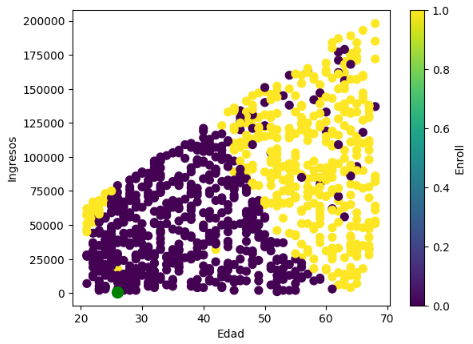

De acuerdo con el modelo K-Means, la persona con las caracteristicas determinadas se ubica en el punto verde oscuro

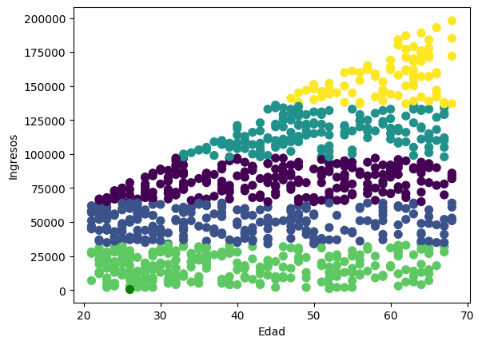

**Punto 7: Determinar el comportamiento del modelo K-Means frente al pronóstico de los datos utilizados para la configuración.**

Segun el modelo de K-Means, la clasificación de la persona se hace en el cluster 4.

**Punto 8: •	Determinar el número de individuos que harán parte de la membresía de acuerdo con cada uno de los clusters, indicando cual es el cluster que presenta la mayor edad, los mayores ingresos y estarán en el gimnasio por un mayor número de horas.**

Cluster 0: 116 individuos

Cluster 1: 66 individuos

Cluster 2: 107 individuos

Cluster 3: 41 individuos

Cluster 4: 73 individuos

-------------------------------------------------------------------

Cluster con mayor edad promedio: Cluster 5

Cluster con mayor ingreso promedio: Cluster 5

Cluster con mayor horas promedio: Cluster 1